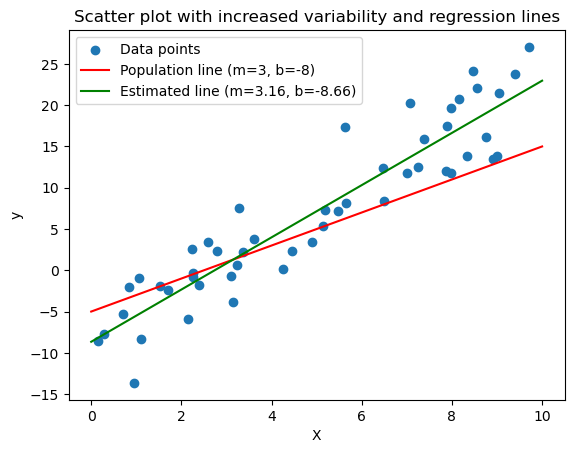

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate the data
x = 10 * np.random.rand(50)
y = 3 * x - 8 + np.random.randn(50) * 4

# Fit a linear regression model
x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

# Calculate the predicted values
y_pred = model.predict(x)

# Plot the scatter plot and regression lines
plt.scatter(x, y, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot with increased variability and regression lines")

# Plot the actual population line
x_line = np.linspace(0, 10, 100)
y_actual = 2 * x_line - 5
plt.plot(x_line, y_actual, 'r', label="Population line (m=3, b=-8)")

# Plot the estimated regression line
y_estimated = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line, y_estimated, 'g', label=f"Estimated line (m={model.coef_[0]:.2f}, b={model.intercept_:.2f})")

# Add legend and show the plot
plt.legend()
plt.show()


In [2]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url, index_col=0)

# Define the independent variables (add a constant for the intercept)
X = data[['TV', 'Radio', 'Newspaper']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['Sales']

# Fit the model using the independent and dependent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 23 Sep 2025   Prob (F-statistic):           1.58e-96
Time:                        00:29:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
n = 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
irrelevant_predictors = np.random.normal(0, 1, (n, 10))

y = 2 * x1 + 3 * x2 + np.random.normal(0, 1, n)

# Helper function to calculate adjusted R-squared
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Fit linear regression models with different predictors
X = pd.DataFrame({'x1': x1, 'x2': x2})
X_with_irrelevant = pd.concat([X] + [pd.Series(irrelevant_predictors[:, i], name=f"irrelevant_{i}") for i in range(10)], axis=1)

model1 = LinearRegression().fit(X, y)
model2 = LinearRegression().fit(X_with_irrelevant, y)

# Calculate R-squared and adjusted R-squared for each model
models = [('Model with relevant predictors', model1, X.shape[1]), ('Model with irrelevant predictors', model2, X_with_irrelevant.shape[1])]

for name, model, k in models:
    r2 = r2_score(y, model.predict(X_with_irrelevant.iloc[:, :k]))
    adj_r2 = adjusted_r2(r2, n, k)
    print(f"{name}: R-squared = {r2:.3f}, Adjusted R-squared = {adj_r2:.3f}")


Model with relevant predictors: R-squared = 0.912, Adjusted R-squared = 0.910
Model with irrelevant predictors: R-squared = 0.919, Adjusted R-squared = 0.908


In [4]:
X

,x1,x2
0,0.496714,-1.415371
1,-0.138264,-0.420645
2,0.647689,-0.342715
3,1.523030,-0.802277
4,-0.234153,-0.161286
...,...,...
95,-1.463515,0.385317
96,0.296120,-0.883857
97,0.261055,0.153725
98,0.005113,0.058209


In [5]:
X_with_irrelevant

,x1,x2,irrelevant_0,irrelevant_1,irrelevant_2,irrelevant_3,irrelevant_4,irrelevant_5,irrelevant_6,irrelevant_7,irrelevant_8,irrelevant_9
0,0.496714,-1.415371,0.357787,0.560785,1.083051,1.053802,-1.377669,-0.937825,0.515035,0.513786,0.515048,3.852731
1,-0.138264,-0.420645,0.570891,1.135566,0.954002,0.651391,-0.315269,0.758969,-0.772825,-0.236819,-0.485364,0.081874
2,0.647689,-0.342715,2.314659,-1.867265,0.686260,-1.612716,-0.471932,1.088951,0.064280,-1.077745,-0.715304,0.679598
3,1.523030,-0.802277,-0.730367,0.216459,0.045572,-0.651600,2.143944,0.633919,-2.025143,0.186454,-0.661786,0.852433
4,-0.234153,-0.161286,-0.792521,-0.114736,0.504987,0.865755,-1.200296,-0.334501,-0.474945,-0.653329,1.765454,0.404982
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.463515,0.385317,-0.991392,-2.153390,-0.638962,-1.323090,1.642015,1.009817,-0.688150,2.252436,0.981765,-0.324831
96,0.296120,-0.883857,-2.499406,2.290943,-1.389572,-1.645399,1.022570,2.439752,1.384273,0.563909,0.594754,0.853416
97,0.261055,0.153725,0.758929,0.281191,0.104201,-0.062593,-0.753965,-0.280675,-1.692957,-0.098340,-0.988591,-1.103589
98,0.005113,0.058209,0.179894,1.392002,0.918317,-1.570501,-0.989628,0.940771,-0.982487,-0.224633,0.550052,-0.968344


In [6]:
import pandas as pd

df = pd.DataFrame()

df['X'] = [2,3,5,5,7]
df['y'] = [2,4,3,5,5]

df

,X,y
0,2,2
1,3,4
2,5,3
3,5,5
4,7,5


In [7]:
import statsmodels.api as sm


# Add a constant to the independent variable
X = sm.add_constant(df['X'])

# Fit the linear regression model
model = sm.OLS(df['y'], X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     3.380
Date:                Tue, 16 Sep 2025   Prob (F-statistic):              0.163
Time:                        19:10:55   Log-Likelihood:                -5.9769
No. Observations:                   5   AIC:                             15.95
Df Residuals:                       3   BIC:                             15.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6579      1.253      1.323      0.2

C:\Users\Suraj\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
